# **<span style="color:deepskyblue">Time</span>**

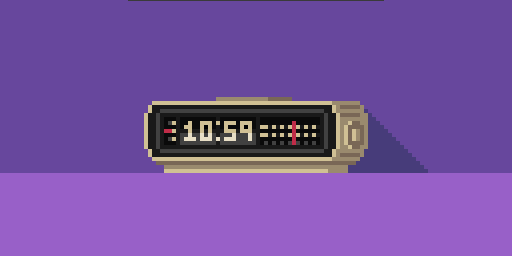


Pygame kann sich die vergangene Zeit zurück geben lassen, seit wann das Spiel gestartet wurde.\
Bzw. seit wann *pygame.init()* aufgerufen wurde.

Zusätzlich können eigene Timer definiert werden.

***

## **<span style="color:deepskyblue">Multiple Lasers</span>**

+ statt dem Rectangle müssen wir eine Liste mit Laserrectangles erstellen

In [ ]:
laser_surface = pygame.image.load(path+"images/projectiles/single_red1.png").convert_alpha()
laser_list = []                                                                 # Laser Liste hier   
#laser_rectangle = laser_surface.get_rect(midbottom = (ship_rectangle.midtop))  # das hier muss dann beim Button Press ausgeführt werden

In [ ]:
# GAME LOOP
while True:
    # 1. Player Inputs 
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            pygame.quit() 
            sys.exit()
    
    if event.type == pygame.JOYBUTTONDOWN:
        if pygame.joystick.Joystick(0).get_button(0) or pygame.joystick.Joystick(0).get_button(1):
            laser_rectangle = laser_surface.get_rect(midbottom = (ship_rectangle.midtop))           # hier das Rectangle erstellen
            laser_list.append(laser_rectangle)                                                      # hier der Liste hinzufügen
            
    #Limiting Frame Rate
    delta_time = clock.tick(60) / 1000
    
    # Analog Stick
    x_speed = round(pygame.joystick.Joystick(0).get_axis(0))
    y_speed = round(pygame.joystick.Joystick(0).get_axis(1))
    move(x_speed, y_speed)
    
    # laser_rectangle.y -= round(200 * delta_time)                                                  # Funktioniert nicht mehr
    
    # 2. Updates
    display.fill((0, 0, 0))
    display.blit(background_surface, (0, 0))
    display.blit(ship_surface, ship_rectangle)
    # display.blit(laser_surface, laser_rectangle)                                                  # kein Rectangle mehr also Fehlermeldung
    display.blit(title_surface, title_rectangle)                                                    # hier muss jetzt ein for loop rein
    
    # Draw custom Rectangles here
    pygame.draw.rect(display, "white", title_rectangle.inflate(50, 40), width=7, border_radius=5)
    
    # draw final frame
    pygame.display.update()

***

## **<span style="color:#fcba04">Code</span> Challenge**

Erstelle einen For Loop, der alle Laser Surfaces an der position der entsprechenden Laser Rectangles zeichnet.

<div class="alert alert-block alert-success">
<b>Lösung Laser Display For Loop</b>
</div>

In [ ]:
for laser in laser_list:
    display.blit(laser_surface, laser)

Anschließend soll ein For Loop erstellt werden der alle Laser im Spiel zum oberen Bildschirmrand bewegt.


<div class="alert alert-block alert-success">
<b>Lösung Laser Movement For Loop</b>
</div>

In [ ]:
import pygame
import math
import sys
path = "Game Dev Projects/01 Space Boi/"

# Move Methode für die Spielfigur
def move(x_speed, y_speed):
    magnitude = math.sqrt(x_speed ** 2 + y_speed ** 2)
    
    if magnitude != 0:
        normalized_x = x_speed / magnitude
        normalized_y = y_speed / magnitude
    else:
        normalized_x, normalized_y = 0, 0
    
    ship_rectangle.move_ip(normalized_x * move_speed, normalized_y * move_speed)

# Bewegung der Laser zum oberen Bildschirmrand
def laser_update(laser_list, speed=300):
    for laser in laser_list:
        laser.y -= speed * delta_time

# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #

# laser_rectangle.y -= round(200 * delta_time)                                                      # hier jetzt die neue Funktio einfügen
laser_update(laser_list)

***

## **<span style="color:deepskyblue">Clean the Lasers</span>**

Ganz am Ende jetzt eine *len()* Funktion und die Laserrectangles anschauen.


In [ ]:
print(len(laser_list))

In [ ]:
# Bewegung der Laser zum oberen Bildschirmrand
def laser_update(laser_list, speed=300):
    for laser in laser_list:
        laser.y -= speed * delta_time
        if laser.bottom < 0:
            laser_list.remove(laser)

***